In [253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import genextreme
from scipy.stats import genpareto as gpd

- Xử lý, tách data

In [254]:
df = pd.read_csv("data/hourly-rain-in-tra-my.csv").fillna(0)

def split_dates(dates):
    dates_arr = np.zeros(shape=(dates.shape[0], 3), dtype=np.uint16)
    for i in range(dates.shape[0]):
        dates_arr[i, 0], dates_arr[i, 1], dates_arr[i, 2] = dates[i].split("/")
    return dates_arr

dates_arr = split_dates(df["Ngay"].to_numpy()).T
df = df.drop(columns=["Ngay"])

df["days"] = dates_arr[1]
df["months"] = dates_arr[0]
df["years"] = dates_arr[2]

df.columns = ["hours", "rains", "landslide", "days", "months", "years"]
df

,hours,rains,landslide,days,months,years
0,1,0.0,0,1,1,2008
1,2,0.5,0,1,1,2008
2,3,1.0,0,1,1,2008
3,4,0.5,0,1,1,2008
4,5,0.2,0,1,1,2008
...,...,...,...,...,...,...
87667,20,0.0,0,31,12,2017
87668,21,0.0,0,31,12,2017
87669,22,0.0,0,31,12,2017
87670,23,0.0,0,31,12,2017


---

- Lượng mưa trung bình trong 10 năm

In [255]:
avg_rain = np.average(df["rains"])
avg_rain

0.5083401770234509

In [256]:
count_slide = df["landslide"].sum()
count_slide

121

In [257]:
mean1 = df[df["landslide"] == 1]["rains"].mean()
mean1

29.48181818181818

In [258]:
# Xác suất lở đất khi mưa lớn hơn ngưỡng trung bình
threshold = mean1
heavy_rain = df[df['rains'] > threshold]
landslide_probability = heavy_rain['landslide'].mean()
landslide_probability

0.30057803468208094

---

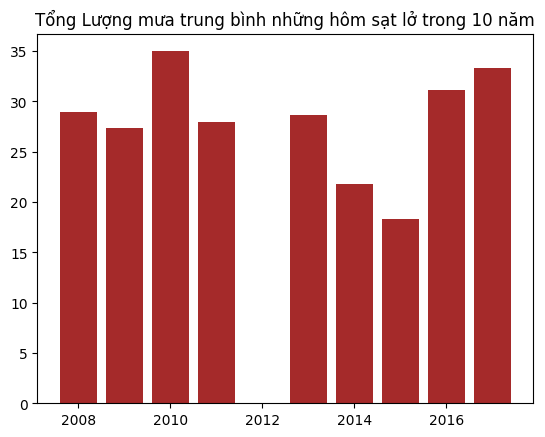

In [259]:
avg_landslide_rain = df[df["landslide"] == 1].groupby("years")["rains"].mean()
avg_landslide_rain
plt.bar(df[df["landslide"] == 1]["years"].unique(), avg_landslide_rain, color="brown")
plt.title("Tổng Lượng mưa trung bình những hôm sạt lở trong 10 năm")
# plt.xticks(range(2008, 2018))
# plt.bar_label(bar)
# plt.grid()
plt.show()

In [260]:
# Tạo một danh sách các năm từ 2008 đến 2017
all_years = range(2008, 2018)

# Sử dụng reindex để thêm các năm còn thiếu và điền giá trị 0 cho các năm không có lở đất
avg_landslide_rain = avg_landslide_rain.reindex(all_years, fill_value=0)
avg_landslide_rain


years
2008    28.980000
2009    27.350000
2010    34.980000
2011    27.993333
2012     0.000000
2013    28.690476
2014    21.800000
2015    18.300000
2016    31.177778
2017    33.289286
Name: rains, dtype: float64

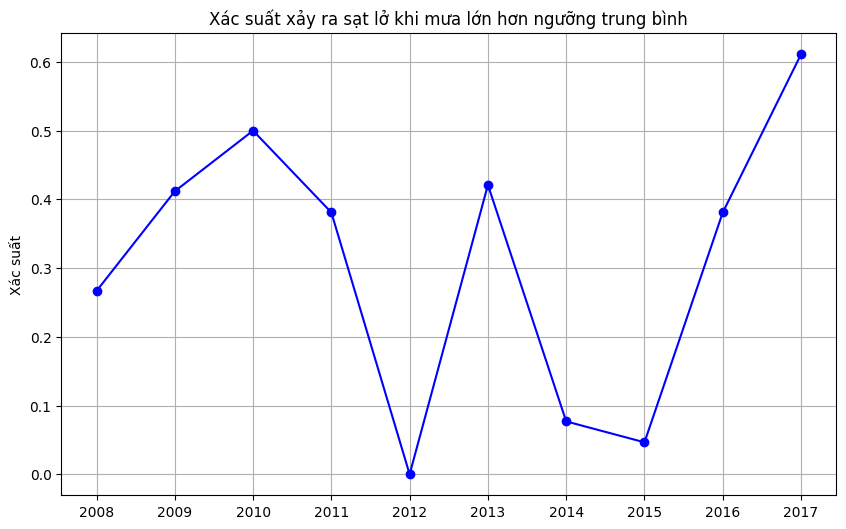

In [261]:
# Tạo danh sách để lưu xác suất lở đất theo từng năm
years = []
conditional_probabilities = []

# Tính xác suất có điều kiện cho từng năm
for year, threshold in avg_landslide_rain.items():
    # Lọc dữ liệu của năm hiện tại
    year_data = df[df["years"] == year]
    # Lọc các sự kiện mưa lớn hơn ngưỡng threshold của năm đó
    heavy_rain_events = year_data[year_data["rains"] > threshold]
    # Tính xác suất lở đất có điều kiện khi mưa lớn hơn ngưỡng threshold
    landslide_probability = heavy_rain_events["landslide"].mean()
    
    years.append(year)
    conditional_probabilities.append(landslide_probability)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(years, conditional_probabilities, marker='o', color='b', linestyle='-')
# plt.xlabel("Năm")
plt.xticks(range(2008, 2018))
plt.ylabel("Xác suất")
plt.title("Xác suất xảy ra sạt lở khi mưa lớn hơn ngưỡng trung bình")
plt.grid(True)
plt.show()


---

- Lượng mưa trung bình theo tháng trong 10 năm

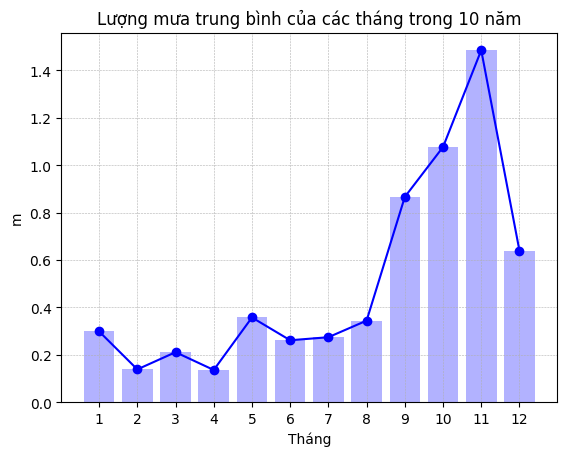

In [262]:
avg_month_rains = np.zeros(12)
for i in range(1, 13):
    idxs = np.where(df["months"]==i)[0]
    avg_month_rains[i-1] = np.average(df["rains"].iloc[idxs])

avg_month_rains
plt.title("Lượng mưa trung bình của các tháng trong 10 năm")
plt.grid(linestyle="--", linewidth=0.4)
plt.bar(x=range(1, 13), height=avg_month_rains, color="blue", alpha=0.3)
plt.plot(range(1, 13), avg_month_rains, color="blue", alpha=1, marker="o")
plt.xticks(range(1, 13))
plt.xlabel("Tháng")
plt.ylabel("m")
# plt.plot(range(1, 13), avg_month_rains, color='blue', linestyle='-', alpha=0.6)
plt.show()

- Lượng mưa tăng dần từ tháng 6, đạt đỉnh vào tháng 11, sau đó giảm. 
- Điều này cho thấy mùa mưa bắt đầu từ giữa năm và kết thúc vào cuối năm, với tháng 11 là tháng có lượng mưa cao nhất.

---

- Lượng mưa trung bình theo năm

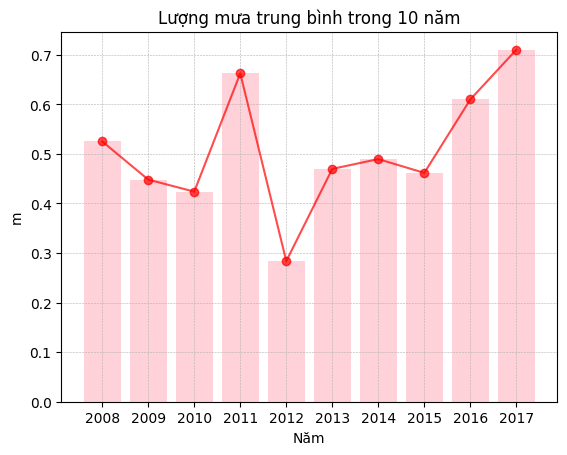

In [263]:
avg_rain_years = np.zeros(10)
count_landslides_year = np.zeros(10)
for i in range(10):
    idxs = np.where(df["years"]==i+2008)[0]
    count_landslides_year[i] = np.sum(df["landslide"].iloc[idxs])
    avg_rain_years[i] = np.average(df["rains"].iloc[idxs])

avg_rain_years
plt.title("Lượng mưa trung bình trong 10 năm")

plt.grid(linestyle="--", linewidth=0.4)
plt.plot(range(2008, 2018), avg_rain_years, color="red", alpha=0.7, marker="o")
plt.bar(range(2008, 2018), avg_rain_years, color="pink", alpha=0.7)

plt.xticks(range(2008, 2018))
plt.xlabel("Năm")
plt.ylabel("m")
# plt.plot(range(2008, 2018), avg_rain_years, color='red', linestyle='-', alpha=0.6)
plt.show()

- Có sự dao động rõ rệt, với các năm như 2010, 2011 và 2017 có lượng mưa tương đối cao, trong khi các năm như 2014 có lượng mưa thấp hơn. 
- Điều này có thể do biến đổi khí hậu hoặc thay đổi trong mô hình thời tiết trong các năm đó.

---

- Số lượng sạt lở theo năm

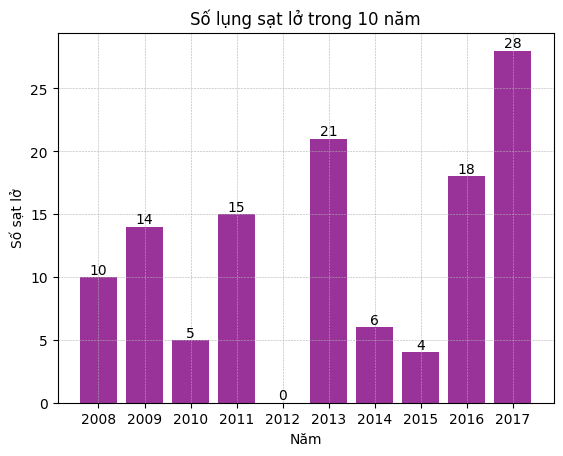

In [264]:
plt.grid(linestyle="--", linewidth=0.4)
plt.title("Số lụng sạt lở trong 10 năm")
bars = plt.bar(x=range(2008, 2018), height=count_landslides_year, color="purple", alpha=0.8)
plt.bar_label(bars)
plt.xticks(range(2008, 2018))
plt.xlabel("Năm")
plt.ylabel("Số sạt lở")
# plt.plot(range(2008, 2018), avg_rain_years, color='red', linestyle='-', alpha=0.6)
plt.show()

- Sự gia tăng rõ rệt số lượng sạt lở đất diễn ra vào năm 2017, tương ứng với lượng mưa cao trong năm đó. 
- Các đỉnh khác của số vụ sạt lở xảy ra vào các năm 2013 và 2010, có thể liên quan đến lượng mưa cao đã được quan sát trong những năm đó.

---

# Thống kê mưa liên tục trong 10 năm

In [265]:
cum_list = [3, 5, 7, 14] 
cum_list = [i * 24 for i in cum_list]
cum_rain_years = np.zeros((len(cum_list), 10), dtype=int)
for i in range(cum_rain_years.shape[0]):
    for j in range(10):
        idxs = np.where(df["years"]==j+2008)[0]
        count = 0
        count_cum = 0
        for k in range(len(idxs)):
            curr_idx = idxs[k]
            if (df["rains"].iloc[curr_idx] > 0):
                if (k == 0 or idxs[k] == idxs[k-1] + 1):
                    count_cum += 1
                else:
                    count_cum = 1

            if (count_cum == cum_list[i]):
                count += 1
                count_cum = 0

        cum_rain_years[i, j] = count


cum_rain_years

array([[24, 16, 20, 27, 18, 21, 22, 19, 23, 28],
       [14,  9, 12, 16, 11, 12, 13, 11, 14, 17],
       [10,  7,  8, 11,  7,  9,  9,  8, 10, 12],
       [ 5,  3,  4,  5,  3,  4,  4,  4,  5,  6]])

- Mưa liên tục 3 ngày, 7 ngày, 14 ngày, 28 ngày 

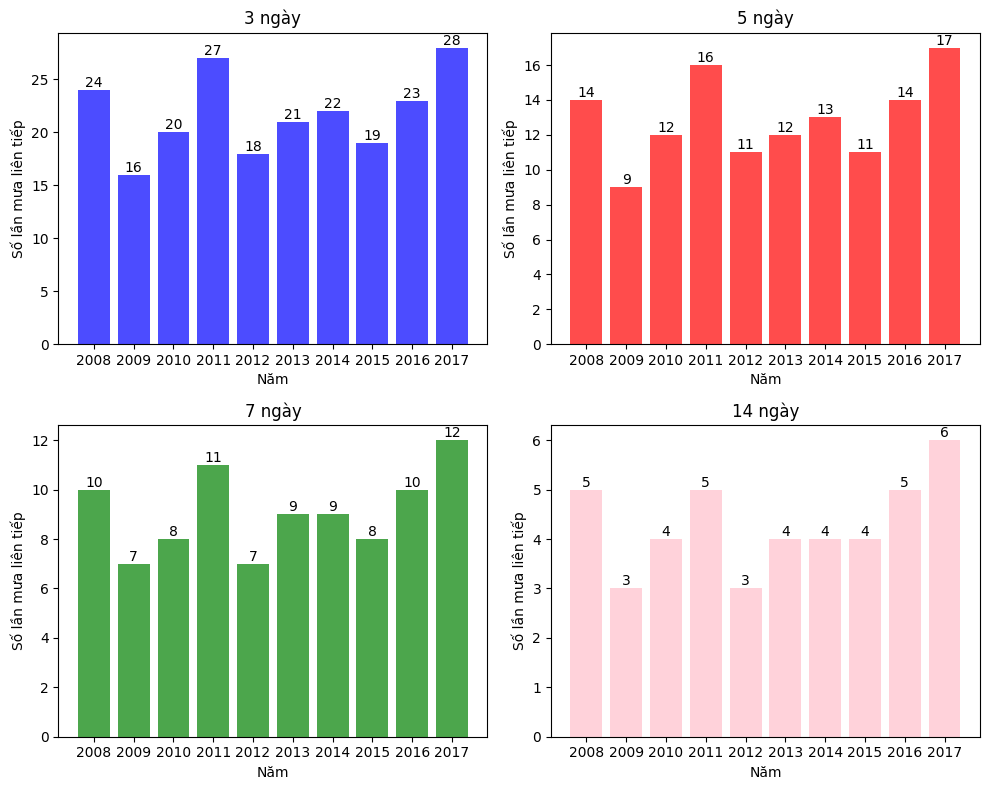

In [266]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

bar1 = axes[0, 0].bar(x=range(2008, 2018), height=cum_rain_years[0], color="blue", alpha=0.7)
axes[0, 0].set_xticks(range(2008, 2018))
axes[0, 0].set_xticklabels(range(2008, 2018))
axes[0, 0].set_xlabel('Năm')
axes[0, 0].set_ylabel('Số lần mưa liên tiếp')
axes[0, 0].set_title("3 ngày")
axes[0, 0].bar_label(bar1)

bar2 = axes[0, 1].bar(x=range(2008, 2018), height=cum_rain_years[1], color="red", alpha=0.7)
axes[0, 1].set_xticks(range(2008, 2018))
axes[0, 1].set_xticklabels(range(2008, 2018))
axes[0, 1].set_xlabel('Năm')
axes[0, 1].set_ylabel('Số lần mưa liên tiếp')
axes[0, 1].set_title("5 ngày")
axes[0, 1].bar_label(bar2)

bar3 = axes[1, 0].bar(x=range(2008, 2018), height=cum_rain_years[2], color="green", alpha=0.7)
axes[1, 0].set_xticks(range(2008, 2018))
axes[1, 0].set_xticklabels(range(2008, 2018))
axes[1, 0].set_xlabel('Năm')
axes[1, 0].set_ylabel('Số lần mưa liên tiếp')
axes[1, 0].set_title('7 ngày')
axes[1, 0].bar_label(bar3)

bar4 = axes[1, 1].bar(x=range(2008, 2018), height=cum_rain_years[3], color="pink", alpha=0.7)
axes[1, 1].set_xticks(range(2008, 2018))
# axes[1, 1].set_yticks(range(0, 4))
axes[1, 1].set_xticklabels(range(2008, 2018))
axes[1, 1].set_xlabel('Năm')
axes[1, 1].set_ylabel('Số lần mưa liên tiếp')
axes[1, 1].set_title('14 ngày')
axes[1, 1].bar_label(bar4)

plt.tight_layout()
plt.show()


- Năm 2017 là năm có số ngày mưa liên tiếp 3/5/7/14 ngày cao nhất
- Biểu đồ 3 ngày (trên cùng, bên trái):
    - Số chuỗi ngày mưa liên tiếp từ 3 ngày dao động mạnh qua các năm.
    - Năm 2011 và 2017 có số lượng chuỗi ngày mưa liên tiếp cao nhất (hơn 25 lần), trong khi các năm khác dao động từ 10 đến 20 lần.
    - Năm 2009 có số lần mưa ít nhất, dưới 15 lần.

- Biểu đồ 5 ngày (trên cùng, bên phải):
    - Số chuỗi ngày mưa liên tiếp từ 5 ngày giảm xuống so với chuỗi 3 ngày.
    - Năm 2011 có số lượng cao nhất, khoảng 16 lần.
    - Các năm 2008, 2009, 2014 có số lần mưa ít nhất, với số lần khoảng 8 đến 10 lần.

- Biểu đồ 7 ngày (dưới cùng, bên trái):
    - Chuỗi ngày mưa 7 ngày xuất hiện ít hơn.
    - Năm 2017 có số lần mưa nhiều nhất (12 lần), tiếp theo là năm 2010 và 2011.
    - Năm 2008, 2014 có số lần mưa ít nhất (dưới 6 lần).

- Biểu đồ 14 ngày (dưới cùng, bên phải):
    - Số chuỗi ngày mưa liên tiếp 14 ngày rất hiếm, dao động từ 3 đến 6 lần.
    - Năm 2017 và 2010 có số lần cao nhất, khoảng 5 đến 6 lần.
    - Các năm 2013, 2014 có số lần thấp nhất, dưới 4 lần.

- Nhận xét chung:
    - Các chuỗi ngày mưa liên tiếp thường xuất hiện nhiều hơn trong khoảng thời gian ngắn (3-5 ngày) và giảm dần khi chuỗi ngày kéo dài hơn (7-14 ngày).
    - Năm 2011 và 2017 là hai năm có tần suất mưa liên tiếp cao nhất cho các chuỗi ngắn (3 và 5 ngày), đặc biệt là chuỗi 3 ngày.
    - Chuỗi mưa dài (14 ngày) khá hiếm, nhưng cũng có sự tăng mạnh vào năm 2017.

---

- Lượng mưa trung bình của 12 tháng trong từng năm

In [267]:
avg_rain_month_10_years = np.zeros((12, 10))
for i in range(12):
    months_df = df[df["months"]==i+1]
    for j in range(10):
        # month_year_idxs = np.where(df.iloc[month_idxs]["years"]==j+2008)[0]
        month_year = months_df[months_df["years"] == j+2008]
        # month_by_year_idx = df["years"].iloc[month_idxs]
        # print(month_year)
        avg_rain = np.average(month_year["rains"])
        avg_rain_month_10_years[i, j] = avg_rain


avg_rain_month_10_years = avg_rain_month_10_years.transpose()

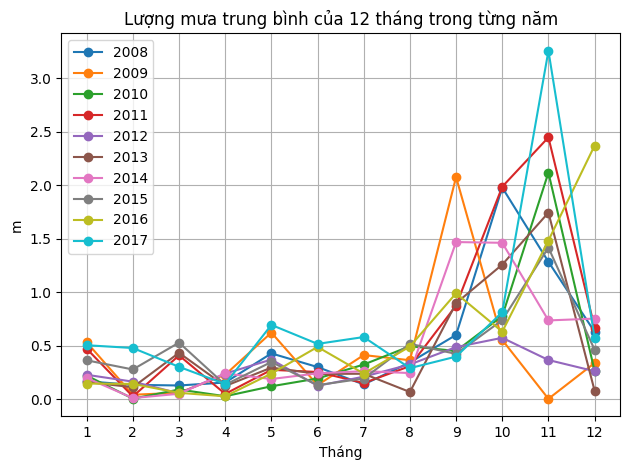

In [268]:
for i in range(10):
    plt.plot(range(1,13),avg_rain_month_10_years[i], marker="o")

plt.xticks(range(1, 13))
plt.grid()
plt.title("Lượng mưa trung bình của 12 tháng trong từng năm")
plt.xlabel("Tháng")
plt.ylabel("m")
plt.tight_layout()
plt.legend(range(2008, 2018))
plt.show()

### Nhận xét chung

- Hầu hết các năm cho thấy lượng mưa thấp từ tháng 1 đến tháng 7
- Lượng mưa sau đó tăng mạnh từ tháng 8 trở đi, đạt đỉnh vào khoảng tháng 10 đến tháng 12. </br>
=> Phản ánh mùa vụ rõ ràng, nơi lượng mưa lớn thường xảy ra vào cuối năm

### Đỉnh điểm bất thường
- Đường màu xanh lam (năm 2017) cho thấy lượng mưa tăng vọt vào tháng 11, đạt trên 3 mét, trở thành sự kiện mưa lớn nhất trong tất cả các năm.
- Đường màu cam (năm 2009) cũng đáng chú ý vào tháng 11, mặc dù thấp hơn so với năm 2017, đạt trên 2,5 mét.

---

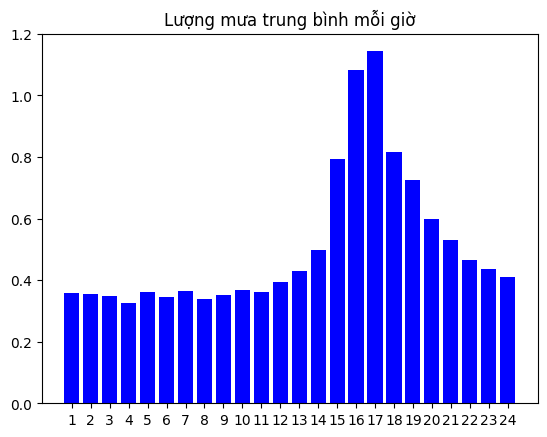

In [269]:
hour_rain = df.groupby("hours")["rains"].mean()
# hour_rain.plot(marker="o", color="red")
plt.title("Lượng mưa trung bình mỗi giờ")
plt.bar(range(1, 25), hour_rain, color="blue")
# plt.grid()
plt.xticks(range(1, 25))
plt.show()

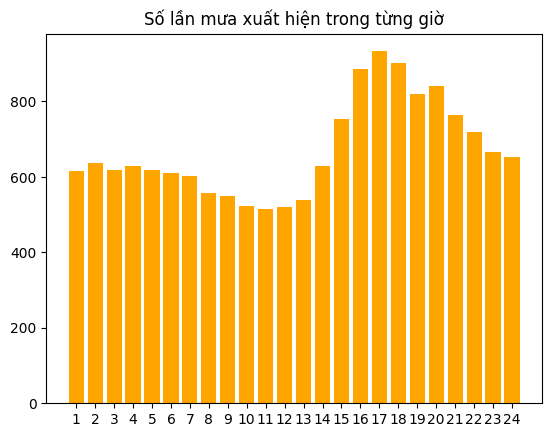

In [270]:
rain_count_hour = df[df["rains"] > 0].groupby("hours")["rains"].count()
# rain_count_hour.plot(marker="o")
plt.bar(range(1, 25), rain_count_hour, color="orange")
plt.title("Số lần mưa xuất hiện trong từng giờ")
plt.xticks(range(1, 25))
plt.show()

- Tập trung nhiều từ khoảng 16h - 21h (tầm chiều, tối)
- Lượng mưa nhiều tập trung ở khoảng 16h - 19h

---

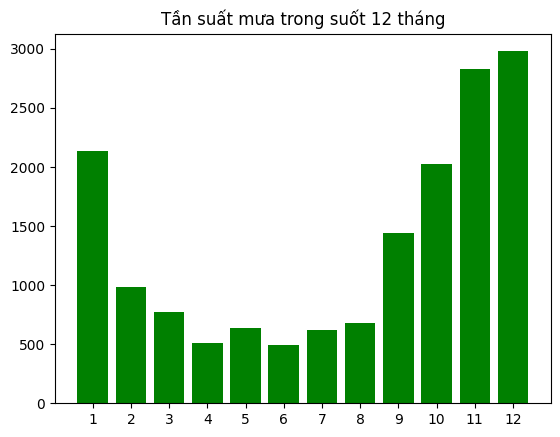

In [271]:
month_count_rain = df[df["rains"] > 0].groupby("months")["rains"].count()
plt.bar(range(1, 13), month_count_rain, color="green")
plt.title("Tần suất mưa trong suốt 12 tháng")
plt.xticks(range(1, 13))
plt.show()

- Mùa mưa kéo dài từ tháng 9 - tháng 12 và kéo dài sang tháng 1 năm sau


---

- Lượng mưa lớn nhất theo mỗi năm

In [281]:
annual_max_rains = df.groupby('years')['rains'].max()
mean2 = annual_max_rains.mean()

---

In [273]:
df['Date'] = pd.to_datetime(df[['years', 'months', 'days']])

- Scatter plot thể hiện lượng mưa và các ngưỡng theo trung bình các năm

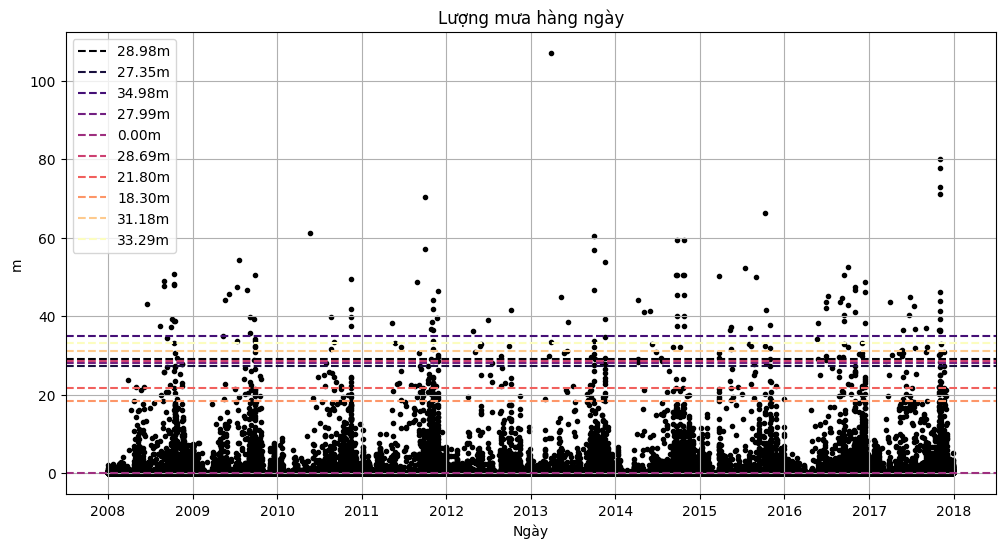

In [274]:
plt.figure(figsize=(12, 6))
plt.scatter(df['Date'], df['rains'], marker='.', color='black')

colors = plt.cm.magma(np.linspace(0, 1, len(avg_landslide_rain)))

for year, threshold, color in zip(years, avg_landslide_rain, colors):
    plt.axhline(y=threshold, color=color, linestyle='--', label=f'{threshold:.2f}m')

plt.xlabel('Ngày')
plt.ylabel('m')
plt.title('Lượng mưa hàng ngày')
plt.grid(True)
plt.xticks(rotation=0)
plt.legend()
plt.show()


- So sánh lượng mưa lớn nhất hàng ngày với PDF của phân phối GEV

In [284]:
max_daily = df.groupby('Date')['rains'].max()
max_daily_filtered = max_daily[max_daily > mean1]
params = genextreme.fit(max_daily_filtered)
shape, loc, scale = params

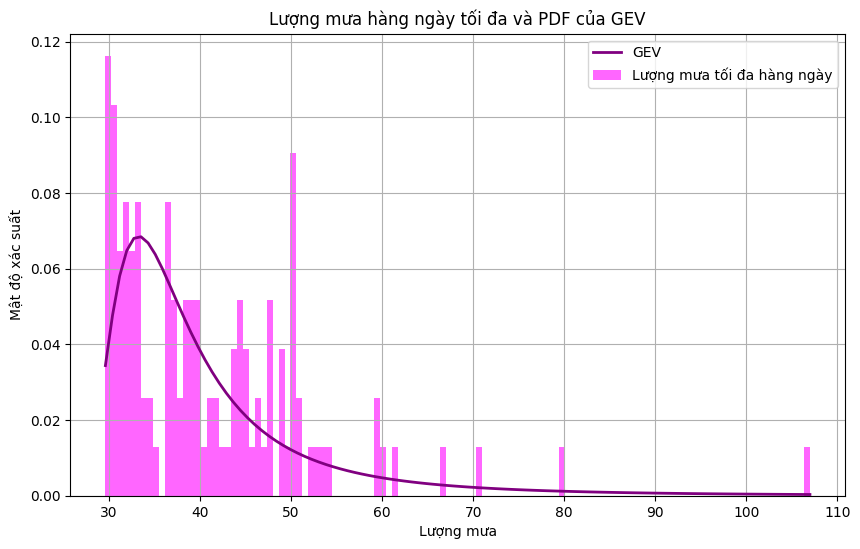

In [285]:

x = np.linspace(min(max_daily_filtered), max(max_daily_filtered), 100)

plt.figure(figsize=(10, 6))
plt.plot(x, genextreme.pdf(x, shape, loc, scale), 'purple', lw=2, label='GEV')

plt.hist(max_daily_filtered, bins=len(max_daily_filtered), alpha=0.6, color='magenta', density=True, label='Lượng mưa tối đa hàng ngày') 

plt.title('Lượng mưa hàng ngày tối đa và PDF của GEV')
plt.xlabel('Lượng mưa')
plt.ylabel('Mật độ xác suất')
plt.legend()
plt.grid(True)
plt.show()


- Phân tích Peak over threshold

Số lần mưa lớn hơn ngưỡng trung bình: 173
Số lần sạt lở đất khi xảy ra mưa cực đoan: 52
Tỷ lệ mưa cực đoan dẫn đến lở đất: 30.06%
Tỷ lệ sạt lở đất khi mưa cực đoan: 42.98%


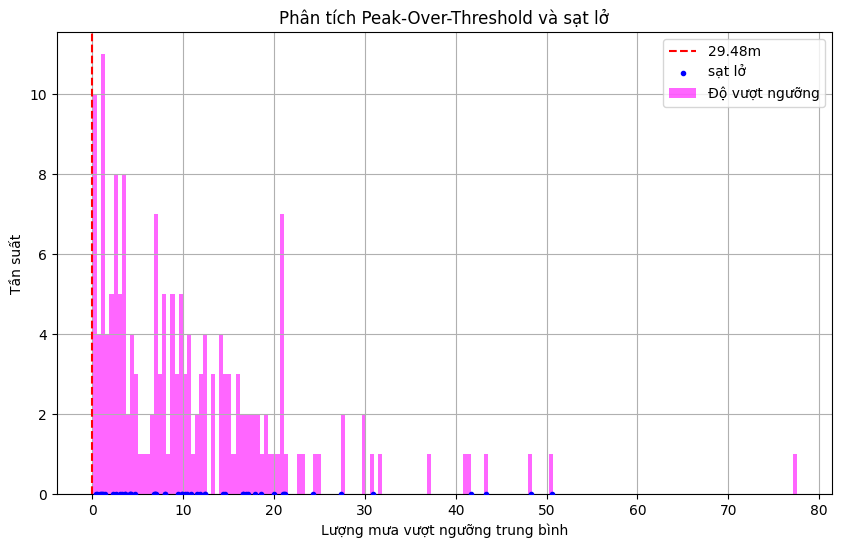

In [287]:
threshold = mean1

rain_extreme = df[df['rains'] > threshold]
exceeds = rain_extreme['rains'] - threshold 

landslides = rain_extreme[rain_extreme['landslide'] == 1]

print(f"Số lần mưa lớn hơn ngưỡng trung bình: {len(rain_extreme)}")
print(f"Số lần sạt lở đất khi xảy ra mưa cực đoan: {len(landslides)}")

landslide_percentage_rain_extreme = len(landslides) / len(rain_extreme)
landslide_percentage = len(landslides) / count_slide
print(f"Tỷ lệ mưa cực đoan dẫn đến lở đất: {landslide_percentage_rain_extreme*100:.2f}%")
print(f"Tỷ lệ sạt lở đất khi mưa cực đoan: {landslide_percentage*100:.2f}%")


plt.figure(figsize=(10, 6))
plt.title('Phân tích Peak-Over-Threshold và sạt lở')
plt.xlabel('Lượng mưa vượt ngưỡng trung bình')
plt.ylabel('Tần suất')

plt.axvline(x=0, color='red', linestyle='--', label=f'{mean1:.2f}m')

plt.scatter(landslides['rains'] - threshold, np.zeros(len(landslides)),
            color='blue', label='sạt lở', zorder=5, marker=".")
plt.hist(exceeds, bins=len(rain_extreme), alpha=0.6, color='magenta', label='Độ vượt ngưỡng')

plt.legend()
plt.grid(True)

plt.show()
